In [43]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray

In [44]:
# Code caveat #1: NumPy
a = [1, 2, 3]
b = [4, 5, 6]
a + b

[1, 2, 3, 4, 5, 6]

In [45]:
try:
    a * b
except:
    print("list a * b has no meaning for Python list")

list a * b has no meaning for Python list


In [46]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a + b

array([5, 7, 9])

In [47]:
a * b

array([ 4, 10, 18])

In [48]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.sum(axis=0)

array([5, 7, 9])

In [49]:

a.sum(axis=1)

array([ 6, 15])

In [50]:
# Basic functions in NumPy
def square(x: ndarray) -> ndarray:
    return np.power(x, 2)

square(np.arange(5))

array([ 0,  1,  4,  9, 16])

In [51]:
def leaky_relu(x: ndarray) -> ndarray:
    return np.maximum(0.2 * x, x)

leaky_relu(np.arange(5))

array([0., 1., 2., 3., 4.])

Text(0, 0.5, 'output')

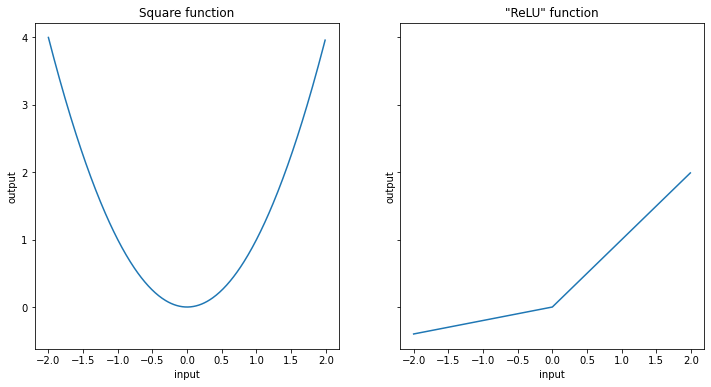

In [52]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')

In [53]:
# Derivatives
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray], input_: ndarray, delta: float = 0.001) -> ndarray:
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

deriv(square, np.array([0, 0.5, 1, 2]))

array([0., 1., 2., 4.])

In [54]:
# Nested Functions
from typing import List

Array_Function = Callable[[ndarray], ndarray]
Chain = List[Array_Function]

def chain_length_2(chain: Chain, a: ndarray) -> ndarray:
    assert len(chain) == 2, "Length of input 'chain' should be 2"
    f1, f2 = chain
    return f2(f1(a))

chain_length_2([square, square], np.array([0, 1, 2, 3]))

array([ 0,  1, 16, 81])

In [55]:
# The Chain Rule
def sigmoid(x: ndarray):
    return 1 / (1 + np.exp(-x)) # [-inf, inf] -> [0, 1]

def chain_deriv_2(chain: Chain, input_range: ndarray) -> ndarray:
    assert len(chain) == 2, "This function requires 'Chain' objects of length 2"
    assert input_range.ndim == 1, "This function requires a 1 dimensional ndarray as input_range"
    f1, f2 = chain
    df1dx = deriv(f1, input_range) # df1/dx
    df2du = deriv(f2, f1(input_range)) # df2/du, f2(u) where u = f1(x)
    return df1dx * df2du

f1 = lambda x: 3*x - 14
f2 = lambda x: -2*x + 6
chain_deriv_2([f1, f2], np.array([5]))


array([-6.])

In [56]:
def plot_chain(ax, chain: Chain, input_range: ndarray) -> None:    
    assert input_range.ndim == 1, "Function requires a 1 dimensional ndarray as input_range"
    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

def plot_chain_deriv(ax, chain: Chain, input_range: ndarray) -> ndarray:  
    assert input_range.ndim == 1, "Function requires a 1 dimensional ndarray as input_range"
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

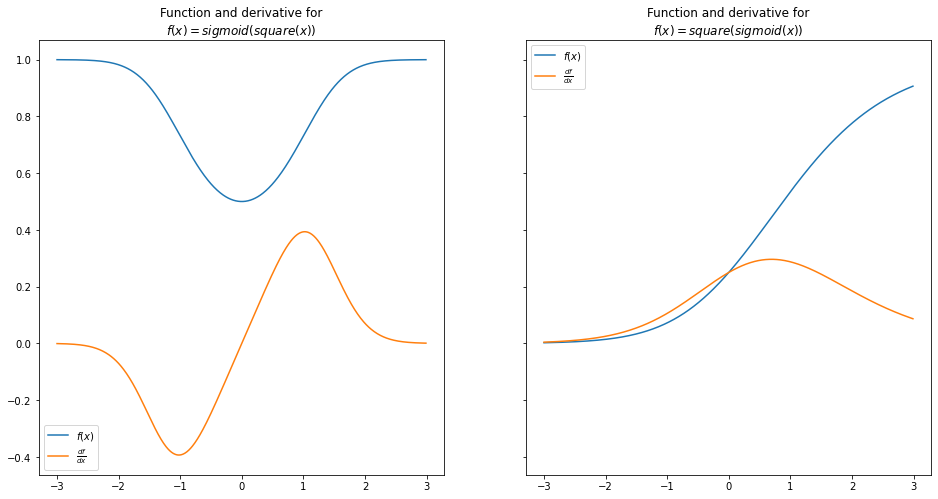

In [57]:
PLOT_RANGE = np.arange(-3, 3, 0.01)
chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)
ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");


In [58]:
# A Slightly Longer Example

def chain_length_3(chain: Chain, a: ndarray) -> ndarray:
    assert len(chain) == 3, "Length of input 'chain' should be 3"
    f1, f2, f3 = chain
    return f3(f2(f1(a)))

def chain_deriv_3(chain: Chain, input_range: ndarray) -> ndarray:
    assert len(chain) == 3, "This function requires 'Chain' objects of length 3"
    assert input_range.ndim == 1, "This function requires a 1 dimensional ndarray as input_range"
    f1, f2, f3 = chain
    # forward pass
    f1_of_x = f1(input_range) # f1(x)
    f2_of_x = f2(f1_of_x) # f2(f1(x))
    # backward pass (?)
    df1dx = deriv(f1, input_range) # df1/dx
    df2du = deriv(f2, f1_of_x) # df2/du, f2(u) where u = f1(x)
    df3dv = deriv(f3, f2_of_x) # df3/dv, f3(v), v = f2(u)
    return df1dx * df2du * df3dv

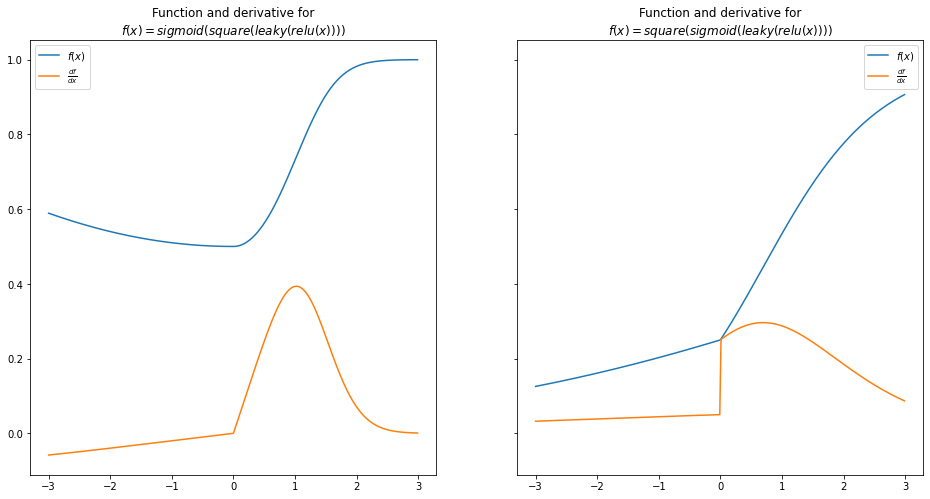

In [59]:
def plot_chain(ax, chain: Chain, input_range: ndarray, length: int=2) -> None:    
    assert input_range.ndim == 1, "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

def plot_chain_deriv(ax, chain: Chain, input_range: ndarray, length: int=2) -> ndarray:
    assert input_range.ndim == 1, "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col
chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leaky(relu(x))))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leaky(relu(x))))$");

In [60]:
# Functions with Multiple Inputs
def multiple_inputs_add(x: ndarray, y: ndarray, sigma: Array_Function) -> float:
    assert x.shape == y.shape
    a = x + y
    return sigma(a)

multiple_inputs_add(np.array([0, 1, 2]), np.array([1, 2, 3]), square)

array([ 1,  9, 25])

In [61]:
def multiple_inputs_add_backward(x: ndarray, y: ndarray, sigma: Array_Function) -> List[float]:
    assert x.shape == y.shape
    a = x + y
    dsda = deriv(sigma, a)
    dadx, dady = 1, 1
    return dsda * dadx, dsda * dady

multiple_inputs_add_backward(np.array([0, 1, 2]), np.array([1, 2, 3]), square)

(array([ 2.,  6., 10.]), array([ 2.,  6., 10.]))

In [62]:
# Functions with Multiple Vector Inputs
def matmul_forward(X: ndarray, W: ndarray) -> ndarray:
    assert X.shape[1] == W.shape[0], "X rows and W columns do not match in number"
    N = np.dot(X, W)
    return N

X = np.array([[0, 1, 2]])
W = np.array([[1], [2], [3]])
matmul_forward(X, W)

array([[8]])

In [63]:
# Derivatives of Functions with Multiple Vector Inputs
def matmul_backward_first(X: ndarray, W: ndarray) -> ndarray:
    dNdX = np.transpose(W)
    return dNdX
    
X = np.array([
    [0, 1, 2], # X1
    [3, 4, 5]  # X2
])
W = np.array([
    # W1, W2
    [1, 4], 
    [2, 5], 
    [3, 6]
])
matmul_backward_first(X, W)

array([[1, 2, 3],
       [4, 5, 6]])

In [64]:
# Vector Functions and Their Derivatives
def matrix_forward_extra(X: ndarray, Y: ndarray, sigma: Array_Function) -> ndarray:
    assert X.shape[1] == W.shape[0], "X rows and W columns do not match in number"
    N = np.dot(X, W)
    S = sigma(N)
    return S

X = np.array([[0, 1, 2]])
W = np.array([[1], [2], [3]])
matrix_forward_extra(X, W, square)

array([[64]])

In [65]:
def matrix_function_backward_1(X: ndarray, Y: ndarray, sigma: Array_Function) -> ndarray:
    assert X.shape[1] == W.shape[0], "X rows and W columns do not match in number"
    N = np.dot(X, W)
    print("N", N)
    dSdN = deriv(sigma, N)
    print("dSdN", dSdN)
    dNdX = np.transpose(W)
    print("dNdX", dNdX)
    return np.dot(dSdN, dNdX)

X = np.array([[0, 1, 2]])
W = np.array([[1], [2], [3]])
matrix_function_backward_1(X, W, square)

N [[8]]
dSdN [[16.]]
dNdX [[1 2 3]]


array([[16., 32., 48.]])

In [66]:
X = np.array([
    [0, 1, 2, 3], # X1
    [4, 5, 6, 7]  # X2
])
W = np.array([
    # W1, W2
    [1, 5], 
    [2, 6], 
    [3, 7],
    [4, 8],
])
matrix_function_backward_1(X, W, square)

N [[ 20  44]
 [ 60 148]]
dSdN [[ 40.  88.]
 [120. 296.]]
dNdX [[1 2 3 4]
 [5 6 7 8]]


array([[ 480.        ,  608.        ,  736.        ,  864.        ],
       [1600.00000001, 2016.00000001, 2432.00000001, 2848.00000002]])

In [67]:
# Is this right?
np.random.seed(190203)
X = np.random.randn(1,3)
print("X", X)
W = np.random.randn(3,1)
print("W", W)
print(matrix_function_backward_1(X, W, sigmoid))

X [[ 0.47231121  0.61514271 -1.72622715]]
W [[ 0.92819676]
 [-0.60754888]
 [-1.22136052]]
N [[2.17301417]]
dSdN [[0.09175527]]
dNdX [[ 0.92819676 -0.60754888 -1.22136052]]
[[ 0.08516695 -0.05574581 -0.11206627]]


In [68]:
def forward_test(ind1, ind2, inc):    
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc
    return matrix_forward_extra(X1, W, sigmoid)

np.round((forward_test(0, 2, 0.01) - forward_test(0, 2, 0)) / 0.01, 2)

array([[-0.11]])

In [69]:
np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2)

N [[2.17301417]]
dSdN [[0.09175527]]
dNdX [[ 0.92819676 -0.60754888 -1.22136052]]


-0.11

In [70]:
# Computational Graph with Two 2D Matrix Inputs
def matrix_function_forward_sum(X: ndarray, Y: ndarray, sigma: Array_Function) -> float:
    assert X.shape[1] == W.shape[0], "X rows and W columns do not match in number"
    N = np.dot(X, W)
    S = sigma(N)
    L = np.sum(S)
    return L

X = np.array([
    [0, 1, 2, 3], # X1
    [4, 5, 6, 7]  # X2
])
W = np.array([
    # W1, W2
    [1, 5], 
    [2, 6], 
    [3, 7],
    [4, 8],
])
matrix_function_forward_sum(X, W, square)

27840

In [79]:
# The Backward Pass
def matrix_function_backward_sum_1(X: ndarray, Y: ndarray, sigma: Array_Function) -> ndarray:
    assert X.shape[1] == W.shape[0], "X rows and W columns do not match in number"
    N = np.dot(X, W)
    print("N", N)
    S = sigma(N)
    print("S", S)
    dLdS = np.ones_like(S)
    print("dLdS", dLdS)
    dSdN = deriv(sigma, N)
    print("dSdN", dSdN)
    dLdN = dLdS * dSdN
    print("dLdN", dLdN)
    dNdX = np.transpose(W)
    print("dNdX", dNdX)
    dLdX = np.dot(dLdN, dNdX)
    return dLdX

X = np.array([
    [0, 1, 2, 3], # X1
    [4, 5, 6, 7]  # X2
])
W = np.array([
    # W1, W2
    [1, 5], 
    [2, 6], 
    [3, 7],
    [4, 8],
])
matrix_function_backward_sum_1(X, W, square)

N [[ 20  44]
 [ 60 148]]
S [[  400  1936]
 [ 3600 21904]]
dLdS [[1 1]
 [1 1]]
dSdN [[ 40.  88.]
 [120. 296.]]
dLdN [[ 40.  88.]
 [120. 296.]]
dNdX [[1 2 3 4]
 [5 6 7 8]]


array([[ 480.        ,  608.        ,  736.        ,  864.        ],
       [1600.00000001, 2016.00000001, 2432.00000001, 2848.00000002]])

In [81]:
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)
round(matrix_function_forward_sum(X, W, sigmoid), 4)

2.3755

In [82]:

matrix_function_backward_sum_1(X, W , sigmoid)

N [[-0.19032808 -0.36617505]
 [-2.23372149  0.50187427]
 [-0.71943713 -0.13504933]]
S [[0.4525611  0.40946559]
 [0.0967629  0.62289969]
 [0.32751694 0.46628889]]
dLdS [[1. 1.]
 [1. 1.]
 [1. 1.]]
dSdN [[0.24774953 0.2418035 ]
 [0.08739984 0.23489565]
 [0.22024958 0.24886354]]
dLdN [[0.24774953 0.2418035 ]
 [0.08739984 0.23489565]
 [0.22024958 0.24886354]]
dNdX [[ 0.75510818 -0.56109271  0.98098478]
 [ 0.25562492 -0.97504841 -0.95870776]]


array([[ 0.2488887 , -0.37478057,  0.01121962],
       [ 0.12604152, -0.27807404, -0.13945837],
       [ 0.22992798, -0.36623443, -0.02252592]])

In [83]:
X1 = X.copy()
X1[0, 0] += 0.001
round((matrix_function_forward_sum(X1, W, sigmoid) - matrix_function_forward_sum(X, W, sigmoid)) / 0.001, 4)

0.2489

In [84]:
# Describing these gradients visually
X

array([[-1.57752816, -0.6664228 ,  0.63910406],
       [-0.56152218,  0.73729959, -1.42307821],
       [-1.44348429, -0.39128029,  0.1539322 ]])

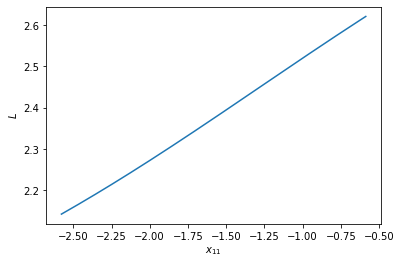

In [85]:
def matrix_function_forward_sum(X: ndarray, W: ndarray, sigma: Array_Function, modify_x11: bool = False, x11: float = 0.5) -> float:
    assert X.shape[1] == W.shape[0], "X rows and W columns do not match in number"    
    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11
    N = np.dot(X1, W)
    S = sigma(N)
    L = np.sum(S)
    return L

x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid, modify_x11 = True, x11=x11) for x11 in x11s]
plt.plot(x11s, Ls)
plt.xlabel("$x_{11}$")
plt.ylabel("$L$")